In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score, hamming_loss
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [30]:
# download the dataset
import urllib.request

urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_train.csv", "./data/X_train.csv")
urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/y_train.csv", "./data/y_train.csv")
urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_test.csv", "./data/X_test.csv")


('./data/X_test.csv', <http.client.HTTPMessage at 0x1da8004bad0>)

In [46]:
X_train = pd.read_csv('./data/X_train.csv')
y_train = pd.read_csv('./data/y_train.csv')
X_test = pd.read_csv('./data/X_test.csv')

In [47]:
columns = X_train.columns

In [48]:
print(X_train.shape)
print(X_train.columns)
print(y_train.columns)

(85751, 8)
Index(['PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST'],
      dtype='object')
Index(['FGM'], dtype='object')


In [49]:
X_train.tail()

,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST
85746,4,404,2.1,0,0.9,22.1,3,6.5
85747,1,211,0.9,2,2.5,5.1,2,2.1
85748,4,627,18.3,0,1.8,25.4,3,4.3
85749,2,229,2.0,1,2.5,14.5,2,1.4
85750,4,266,12.6,0,0.3,1.3,2,4.6


### Split dataset

In [50]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_valid.shape)

(60025, 8)
(25726, 8)


### Apply MinMax scaling to normalize data

In [51]:
## preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


### Part 1

In [52]:
# use all features to train ridge classifier model using degree=1
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_valid_poly = poly.transform(X_valid)
ridge = RidgeClassifier()

ridge.fit(X_train_poly,y_train.values.ravel())
y_train_pred = ridge.predict(X_train_poly)
y_valid_pred = ridge.predict(X_valid_poly)

#train and test score for ridge classifier
train_score_ridge = ridge.score(X_train_poly, y_train)
test_score_ridge = ridge.score(X_valid_poly, y_valid)
print("\nRidge Classifier Model alpha=1............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))
# print the hamming_loss
print("The hamming_loss for ridge model is {}".format(hamming_loss(y_valid, y_valid_pred)))



Ridge Classifier Model alpha=1............................................

The train score for ridge model is 0.6062807163681799
The test score for ridge model is 0.6068568763119023
The hamming_loss for ridge model is 0.3931431236880976


In [53]:
# use all features to train ridge classifier model using degree=2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_valid_poly = poly.transform(X_valid)
ridge = RidgeClassifier()

ridge.fit(X_train_poly,y_train.values.ravel())
y_train_pred = ridge.predict(X_train_poly)
y_valid_pred = ridge.predict(X_valid_poly)

#train and test score for ridge classifier
train_score_ridge = ridge.score(X_train_poly, y_train)
test_score_ridge = ridge.score(X_valid_poly, y_valid)
print("\nRidge Classifier Model degree=2............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))
# print the hamming_loss
print("The hamming_loss for ridge model is {}".format(hamming_loss(y_valid, y_valid_pred)))



Ridge Classifier Model degree=2............................................

The train score for ridge model is 0.6158767180341524
The test score for ridge model is 0.6150586954831688
The hamming_loss for ridge model is 0.38494130451683123


In [54]:
# use all features to train ridge classifier model using degree=4
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_valid_poly = poly.transform(X_valid)
ridge = RidgeClassifier()

ridge.fit(X_train_poly,y_train.values.ravel())
y_train_pred = ridge.predict(X_train_poly)
y_valid_pred = ridge.predict(X_valid_poly)

#train and test score for ridge classifier
train_score_ridge = ridge.score(X_train_poly, y_train)
test_score_ridge = ridge.score(X_valid_poly, y_valid)
print("\nRidge Classifier Model degree=4............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))
# print the hamming_loss
print("The hamming_loss for ridge model is {}".format(hamming_loss(y_valid, y_valid_pred)))



Ridge Classifier Model degree=4............................................

The train score for ridge model is 0.6212078300708038
The test score for ridge model is 0.6147088548550105
The hamming_loss for ridge model is 0.3852911451449895


### Part 2

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



[degree = 1]
hamming_loss train: 0.39, test: 0.39

[degree = 2]
hamming_loss train: 0.38, test: 0.38


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



[degree = 3]
hamming_loss train: 0.38, test: 0.38


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



[degree = 4]
hamming_loss train: 0.38, test: 0.39


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



[degree = 5]
hamming_loss train: 0.37, test: 0.39


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.48598e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



[degree = 6]
hamming_loss train: 0.36, test: 0.40


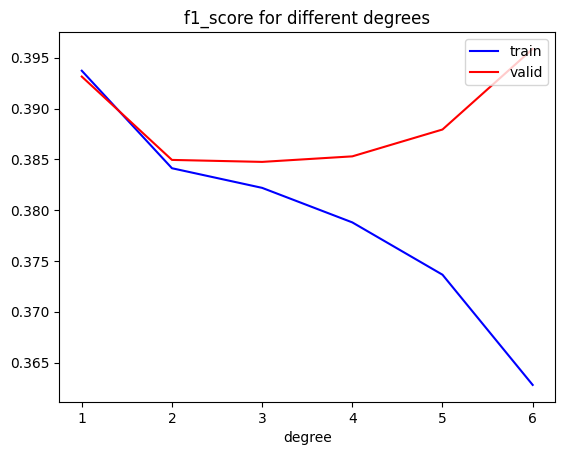

In [55]:
f1_train = []
f1_valid = []
degrees = range(1, 7)

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_valid_poly = poly.transform(X_valid)
    lr_rg = RidgeClassifier(alpha=1)
    lr_rg.fit(X_train_poly, y_train)

    y_train_pred = lr_rg.predict(X_train_poly)
    y_valid_pred = lr_rg.predict(X_valid_poly)

    print('\n[degree = %d]' % d )
    print('hamming_loss train: %.2f, test: %.2f' % (
                    hamming_loss(y_train, y_train_pred),
                    hamming_loss(y_valid, y_valid_pred))) 
    f1_train.append(hamming_loss(y_train, y_train_pred))
    f1_valid.append(hamming_loss(y_valid, y_valid_pred))

plt.plot(degrees, f1_train, label='train', color='b')
plt.plot(degrees, f1_valid, label='valid', color='r')
plt.xlabel('degree')
plt.legend(loc='upper right')
plt.title('f1_score for different degrees')
plt.show() 

### Part 3

In [56]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
accuracy_before = rf.score(X_valid, y_valid)
print(f'Accuracy before feature selection: {accuracy_before:.2f}')

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy before feature selection: 0.60


In [57]:
X_train = pd.DataFrame(X_train, columns=columns)
X_valid = pd.DataFrame(X_valid, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)
importances = rf.feature_importances_
feature_names = columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Rank features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Select top N features (example selecting top 10 features)
top_features = feature_importance_df['Feature'][:10].values
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]
X_valid_selected = X_valid[top_features]

          Feature  Importance
5       SHOT_DIST    0.203140
1      GAME_CLOCK    0.200254
2      SHOT_CLOCK    0.185948
7  CLOSE_DEF_DIST    0.165503
4      TOUCH_TIME    0.140963
0          PERIOD    0.048869
3        DRIBBLES    0.047423
6        PTS_TYPE    0.007899


### Part 4

In [59]:
oly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_selected)
X_valid_poly = poly.transform(X_valid_selected)
ridge = RidgeClassifier()

ridge.fit(X_train_poly,y_train.values.ravel())
y_train_pred = ridge.predict(X_train_poly)
y_valid_pred = ridge.predict(X_valid_poly)

#train and test score for ridge classifier
train_score_ridge = ridge.score(X_train_poly, y_train)
test_score_ridge = ridge.score(X_valid_poly, y_valid)
print("\nRidge Classifier Model degree=4............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))
# print the hamming_loss
print("The hamming_loss for ridge model is {}".format(hamming_loss(y_valid, y_valid_pred)))

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.48594e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Ridge Classifier Model degree=4............................................

The train score for ridge model is 0.6372011661807581
The test score for ridge model is 0.604135893648449
The hamming_loss for ridge model is 0.39586410635155095


### Store the predicted result in CSV file

In [60]:
# get the prediction of X_test
X_test_poly = poly.transform(X_test_selected)
y_test_pred = ridge.predict(X_test_poly)
print(y_test_pred)
# save the prediction to 'y_test_pred.csv'
pd.DataFrame(y_test_pred).to_csv('y_test_pred.csv', header=['prediction'], index=False)

[0 0 1 ... 0 0 0]


## Report
#### In part one, I choose to use ridge classifier as my linear model because the predicted value is only 0 and 1 just like a classification problem. Afterwards, I use polyfeature to test the performance using different model complexity. However, the improvement is not significant.

#### In part two, I plot the error curve where the X-axis is the model complexity. I use hamming_loss instead of MSE because it is more like a classification problem. According to the figure, the model starts to over-fit when the degree is set to 3 (validation error starts to enlarge). Therefore, I set the degree to 2 in polyfeature and use ridge classifier as my model.

#### In part three, I first build a random forest using original data (before polyfeature), and get feature importance to select the top three features.

#### In part four, transform the selected features using polyfeature with degree = 2 and train the ridge classifier model. Even after feature selection, the performance still didn't improve a lot.